In [102]:
using Pkg
pkg_folder = "../"
Pkg.activate(pkg_folder)
using BenchmarkTools
import Markdown; Base.showable(::MIME"text/markdown", ::Markdown.MD) = false # to make sth like """?replace"""  works for vscode backend, remember to choose Jupyter kernel
include(pkg_folder*"bnc_initialize.jl")
Threads.nthreads() # check number of threads

  Activating project at `~/Realizibility_index/bnc_julia`


24

In [4]:
N = [1 1 0 -1 0 0 0
     1 0 1 0 -1 0 0
     0 1 1 0 0 -1 0
     0 1 0 0 1 0 -1
     ]
model = Bnc(N=N)

Bnc{Int8}([1 1 … 0 0; 1 0 … 0 0; 0 1 … -1 0; 0 1 … 0 -1], [1 0 … 0 1; 0 1 … 1 1; 0 0 … 1 1], 4, 7, 3, Num[x₁, x₂, x₃, x₄, x₅, x₆, x₇], Num[q₁, q₂, q₃], Num[K₁, K₂, K₃, K₄], nothing, Vector{Int8}[], Dict{Vector{Int8}, Int64}(), Bool[], Int8[], nothing, Dict{Vector{Int8}, Any}(), Dict{Vector{Int8}, Tuple{SparseMatrixCSC{Float64, Int64}, Int8}}(), 1, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.6020599913279624, 0.6020599913279624, 0.6020599913279624, 0.0, 0.0, 0.0, 0.0], false, sparse([1, 2, 3, 1, 2, 1, 3, 2, 3, 1, 2, 3], [1, 2, 3, 4, 4, 5, 5, 6, 6, 7, 7, 7], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 3, 7), sparse([1, 2, 3, 1, 2, 1, 3, 2, 3, 1, 2, 3], [1, 2, 3, 4, 4, 5, 5, 6, 6, 7, 7, 7], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 3, 7), [[1, 4, 5, 7], [2, 4, 6, 7], [3, 5, 6, 7]], sparse([1, 2, 1, 3, 4, 2, 3, 1, 2, 4, 3, 4], [1, 1, 2, 2, 2, 3, 3, 4, 5, 5, 6, 7], [1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1], 4, 7), sparse([1, 4, 5, 2, 4, 6, 7, 3, 5, 6  …  3, 5, 7, 2, 3, 6, 1, 2, 3, 7], [1, 1, 1, 2, 2, 2, 2

In [5]:
model.L

3×7 Matrix{Int64}:
 1  0  0  1  1  0  1
 0  1  0  1  0  1  1
 0  0  1  0  1  1  1

In [6]:
vtx1 = [1,4,5]
vtx2 = [4,2,3]

3-element Vector{Int64}:
 4
 2
 3

In [20]:
C1,C01 = get_C_C0_qK!(model,[1,4,5])
C2,C02 = get_C_C0_qK!(model,[4,2,3])

(sparse([4, 6, 7, 9, 1, 2, 4, 6, 7, 8  …  2, 3, 6, 7, 9, 5, 8, 3, 6, 9], [1, 1, 1, 1, 2, 2, 2, 2, 2, 2  …  5, 5, 5, 5, 5, 6, 6, 7, 7, 7], [-1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 9, 7), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [21]:
using Polyhedra

In [23]:
detecthlinearity!(poly_ins)

In [24]:
vrep_poly = MixedMatVRep(vrep(poly_ins))

V-representation MixedMatVRep{Float64, Matrix{Float64}}:
1-element iterator of Vector{Float64}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
1-element iterator of Line{Float64, Vector{Float64}}:
 Line([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]),
5-element iterator of Ray{Float64, Vector{Float64}}:
 Ray([-0.0, -0.0, -0.0, -1.0, -1.0, -0.0, 0.0])
 Ray([1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0])
 Ray([0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0])
 Ray([-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0])
 Ray([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0])

In [25]:
vrep_poly

V-representation MixedMatVRep{Float64, Matrix{Float64}}:
1-element iterator of Vector{Float64}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
1-element iterator of Line{Float64, Vector{Float64}}:
 Line([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]),
5-element iterator of Ray{Float64, Vector{Float64}}:
 Ray([-0.0, -0.0, -0.0, -1.0, -1.0, -0.0, 0.0])
 Ray([1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0])
 Ray([0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0])
 Ray([-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0])
 Ray([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0])

In [47]:
point_smp = get_one_inner_point(poly_ins)
start_qK = copy(point_smp)
end_qK = copy(point_smp)
start_qK[1] -=3
end_qK[1] +=3
(t,lgx) = x_traj_with_qK_change(model,start_qK,end_qK;input_logspace=true,output_logspace=true, saveat=range(0,1,1000),tstops=range(0,1,1000))
rgm_x = lgx .|> x->assign_vertex_x(model,x;input_logspace=true) |> x->get_idx(model,x)
rgm_qK = lgx .|> x->assign_vertex_qK(model;x=x, input_logspace=true)|> x->get_idx(model,x)

1000-element Vector{Int64}:
 15
 15
 15
 15
 15
 15
 15
 15
 15
 15
 15
 15
 15
  ⋮
  6
  6
  6
  6
  6
  6
  6
  6
  6
  6
  6
  6

In [54]:
unique(rgm_x)

4-element Vector{Int64}:
 15
 19
 20
  6

In [102]:
Int8[4, 2, 3] |> Array |>string

"Int8[4, 2, 3]"

p = [0, 1]
t = Int8[4, 2, 3]
p = [0, 2]
t = Int8[4, 4, 3]
p = [0, 3]
t = Int8[4, 4, 5]
p = [0, 4]
t = Int8[1, 4, 5]


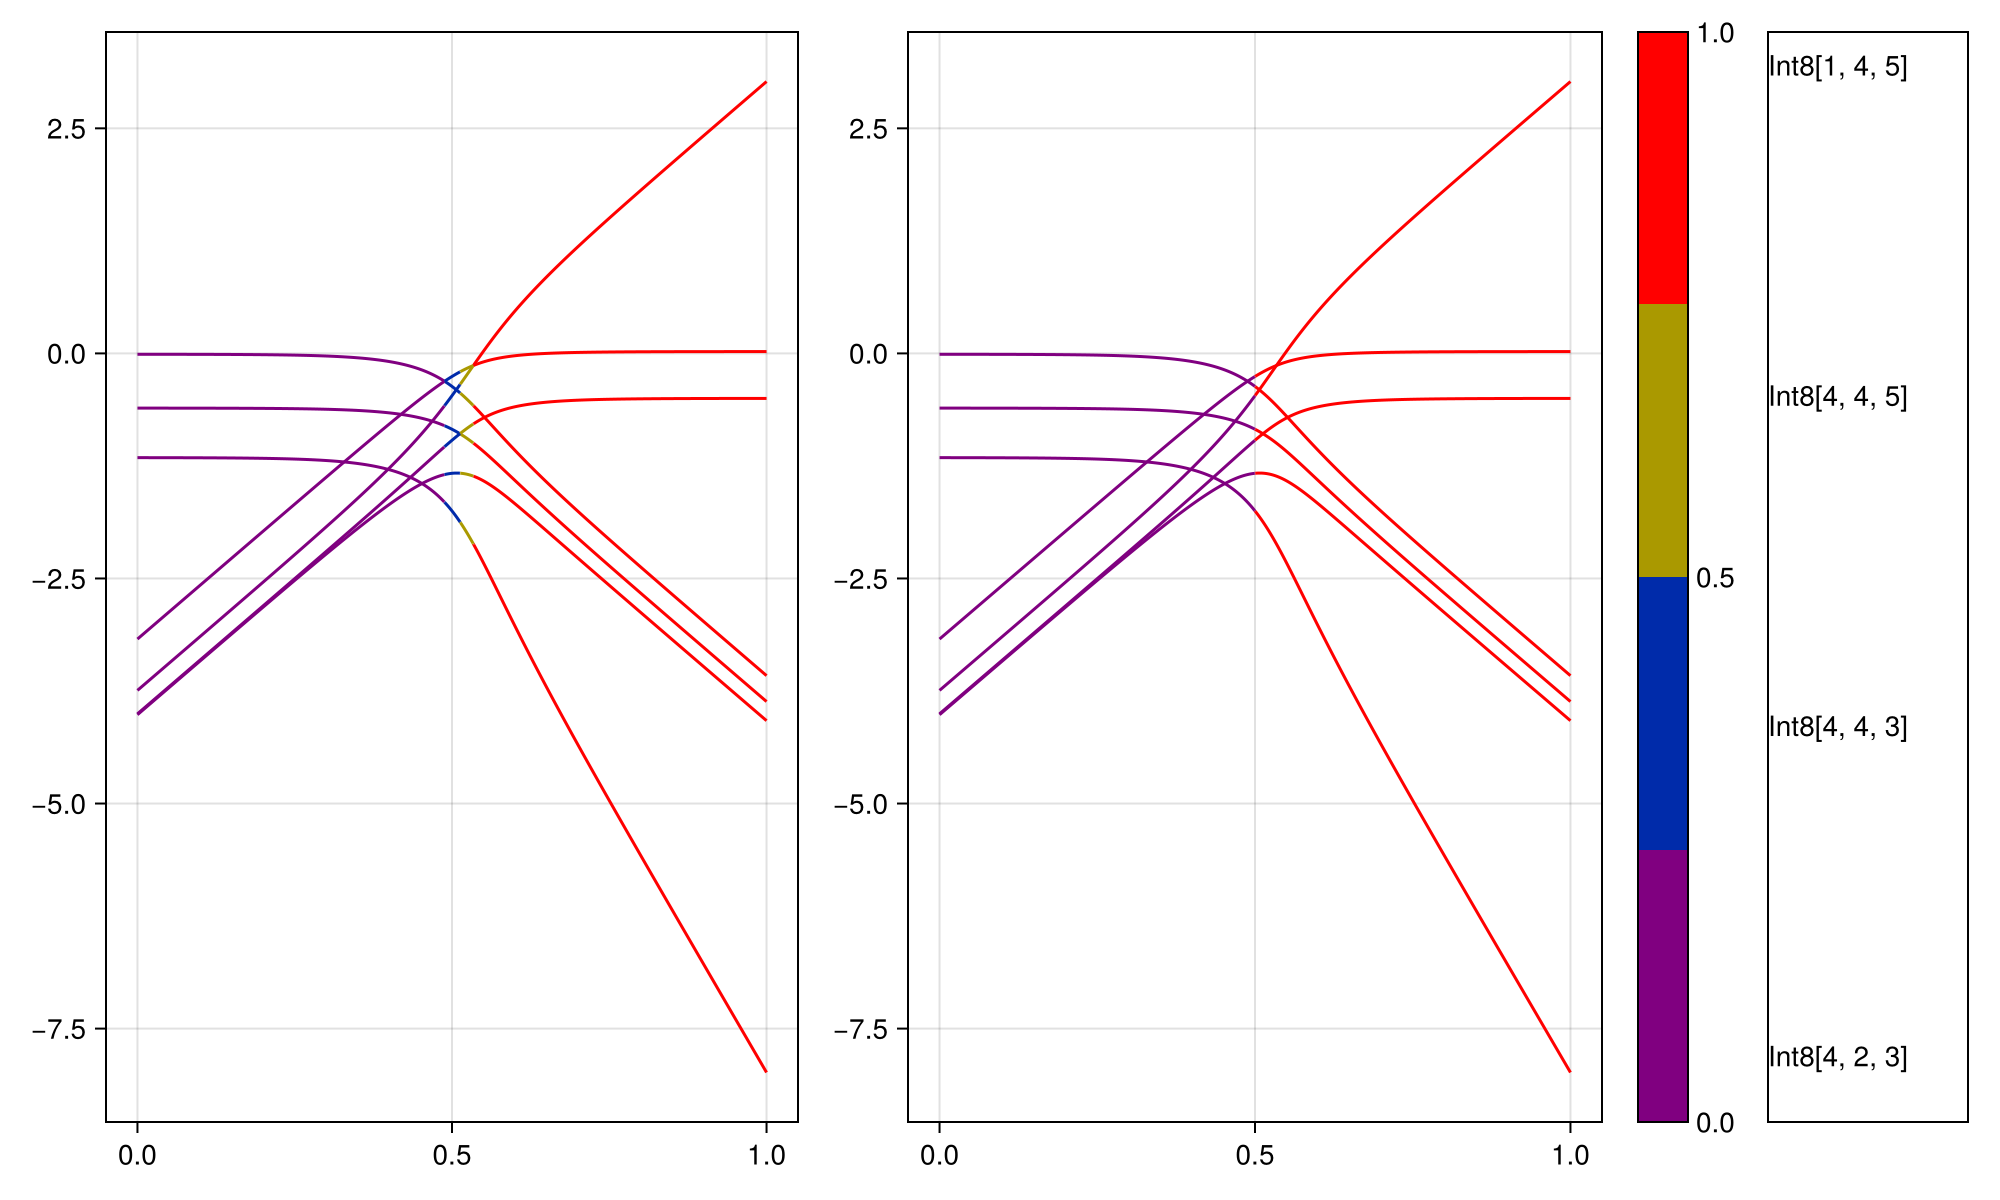

CairoMakie.Screen{IMAGE}


In [112]:
(minval,maxval) = values(model.vertices_idx) |> x->(minimum(x),maximum(x))
mapping_col = Dict(15=>1,19=>2,20=>3,6=>4)
mapping_perm = Dict()

using CairoMakie
cmap = :rainbow
# nlevels = maxval - minval + 1
cmap_disc = cgrad(cmap, 4, categorical=true)
# crange = (minval, maxval)
crange = (1,4)

fig = Figure(size=(1000,600))
ax = Axis(fig[1,1])
for i in 1:model.n
    lines!(ax, t, lgx .|> x->x[i]; colormap=cmap, color = rgm_x .|> x-> mapping_col[x] ,colorrange=crange)
end

ax2 = Axis(fig[1,2])
for i in 1:model.n
    lines!(ax2, t, lgx .|> x->x[i]; colormap=cmap, color = rgm_qK.|> x-> mapping_col[x] ,colorrange=crange)
end

ax3 = Colorbar(fig[1,3], colormap = cmap_disc, ticksvisible=false,labelvisible=false,size=25)
# hidexdecorations!(ax3)

ax4 = Axis(fig[1,4],)
hidexdecorations!(ax4)
hideydecorations!(ax4)
colsize!(fig.layout,4,Fixed(100))

posi = [[0,i] for i in 1:4]
txt = [get_perm(model,x) for x in [15,19,20,6]]

for (p, t) in zip(posi,txt)
    @show p
    @show t
    text!(ax4, p...; text = string(t))
end
xlims!(ax4,(0,1))
display(fig)

In [45]:
poly1 = get_polyhedra(model,[4,4,3])
poly2 = get_polyhedra(model,[4,4,5])

LoadError: UndefVarError: `get_poly_singular` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

## The above example is too complicated, instead we shall use a simpler one to study this phenominon

In [47]:
L = [1 0 0 1 1
     0 1 0 1 0
     0 0 1 0 1]
model = Bnc(L = L)
model.N

2×5 Matrix{Int64}:
 1  1  0  -1   0
 1  0  1   0  -1

In [48]:
vtx1 = [4,4,5]
vtx2 = [4,4,3]

3-element Vector{Int64}:
 4
 4
 3

In [50]:
poly1 = get_poly(model,vtx1)
poly2 = get_poly(model,vtx2)

poly_int = intersect(poly1,poly2) 
detecthlinearity!(poly_int)
poly_int

Start finding all vertices, it may takes a while.
Done, with 12 vertices found and 12 asymptotic vertices.
Start calculating nullity for each vertex, it may takes a while.
Done.


Polyhedron CDDLib.Polyhedron{Float64}:
1-element iterator of HyperPlane{Float64, Vector{Float64}}:
 HyperPlane([1.0000000000000002, -1.0, -0.0, -0.0, -0.0], 0.0),
6-element iterator of HalfSpace{Float64, Vector{Float64}}:
 HalfSpace([-1.0, -1.0000000000000002, -0.0, 1.9999999999999996, -0.0], 0.0)
 HalfSpace([-1.0, -1.000000000000001, -0.0, -0.0, 2.000000000000001], 0.0)
 HalfSpace([-1.0, -1.0000000000000013, 2.0, -0.0, -0.0], 0.0)
 HalfSpace([-1.0, -1.0000000000000004, -0.0, 2.0, -0.0], 0.0)
 HalfSpace([-1.0, -1.0000000000000002, 2.0000000000000004, 1.999999999999999, -1.999999999999999], 0.0)
 HalfSpace([-0.0, -0.0, -0.0, 1.0, -1.0], 0.0)

In [51]:
vrep(poly_int)

V-representation CDDGeneratorMatrix{Float64, Float64}:
1-element iterator of Vector{Float64}:
 [0.0, 0.0, 0.0, 0.0, 0.0],
1-element iterator of Line{Float64, Vector{Float64}}:
 Line([0.9999999999999996, 0.9999999999999998, 0.9999999999999996, 1.0, 1.0]),
3-element iterator of Ray{Float64, Vector{Float64}}:
 Ray([1.0, 1.0000000000000002, 1.0, 0.0, 0.0])
 Ray([0.0, 0.0, -8.88178419700124e-16, -1.0, 0.0])
 Ray([2.220446049250314e-16, 2.220446049250314e-16, -1.0, 0.0, 0.0])

In [56]:
isempty(poly_int)

false

In [52]:
dim(poly_int)

4

In [53]:
dim(poly1)

4

In [54]:
dim(poly2)

4

In [75]:
a = randomize(dim(poly1),Int(1e4))
is_int_1 = a .|> smp -> in([smp[1];smp], poly1)
is_int_2 = a .|> smp -> in([smp[1];smp], poly2)
v = [(i,j) for (i,j) in zip(is_int_1,is_int_2)]
countmap(v)

Dict{Tuple{Bool, Bool}, Int64} with 4 entries:
  (0, 0) => 5698
  (1, 1) => 1313
  (0, 1) => 1724
  (1, 0) => 1265

In [68]:
get_one_inner_point(poly_int)

5-element Vector{Float64}:
  1.301383683810971
  1.301383683810971
 -0.5383192181766436
 -2.3003920757227236
 -0.17666276437030634

In [69]:
change_idx = 1

point_smp = get_one_inner_point(poly_int)
start_qK = copy(point_smp)
end_qK = copy(point_smp)
start_qK[change_idx] -=3
end_qK[change_idx] +=3
(t,lgx) = x_traj_with_qK_change(model,start_qK,end_qK;input_logspace=true,output_logspace=true, saveat=range(0,1,1000),tstops=range(0,1,1000))
rgm_x = lgx .|> x->assign_vertex_x(model,x;input_logspace=true) |> x->get_idx(model,x)
rgm_qK = lgx .|> x->assign_vertex_qK(model;x=x, input_logspace=true)|> x->get_idx(model,x)

rgm_lib = unique(rgm_x)

4-element Vector{Int64}:
 5
 7
 8
 4

In [70]:
rgm_lib .|> x->get_perm(model,x)

4-element Vector{Vector{Int8}}:
 [4, 2, 3]
 [4, 4, 3]
 [4, 4, 5]
 [1, 4, 5]

In [71]:
rgm_qK |> unique .|> x->get_perm(model,x)

2-element Vector{Vector{Int8}}:
 [4, 2, 3]
 [1, 4, 5]

In [74]:
using GLMakie

[ Info: Precompiling GLMakie [e9467ef8-e4e7-5192-8a1a-b1aee30e663a] (cache misses: wrong dep version loaded (2), incompatible header (14))


In [78]:
(minval,maxval) = (1, length(rgm_lib))
mapping_col = Dict(j => i for (i,j) in enumerate(rgm_lib))

cmap = :rainbow
cmap_disc = cgrad(cmap, maxval, categorical=true)
crange = (minval, maxval)

fig = Figure(size=(1000,600))
ax = Axis(fig[1,1])
for i in 1:model.n
    lines!(ax, t, lgx .|> x->x[i]; colormap=cmap, color = rgm_x .|> x-> mapping_col[x] ,colorrange=crange)
end

ax2 = Axis(fig[1,2])
for i in 1:model.n
    lines!(ax2, t, lgx .|> x->x[i]; colormap=cmap, color = rgm_qK.|> x-> mapping_col[x] ,colorrange=crange)
end

ax3 = Colorbar(fig[1,3], colormap = cmap_disc, ticksvisible=false,labelvisible=false,size=25)
# hidexdecorations!(ax3)

ax4 = Axis(fig[1,4])
hidexdecorations!(ax4)
hideydecorations!(ax4)
colsize!(fig.layout,4,Fixed(100))
posi = [[0,i] for i in 1:maxval]
txt = [get_perm(model,x) for x in rgm_lib]
for (p, t) in zip(posi,txt)
    text!(ax4, p...; text = string(t))
end
xlims!(ax4,(0,1))
display(fig)

GLMakie.Screen(...)

In [115]:
logK1 = -1.5
logK2 = 1.5

logT1_rg = (-6,6)
logT2_rg = (-6,6)
logT3_rg = (-6,6)


total_points = 1000000
point_num_eachdim = round(Int, total_points^(1/3))

logT1_step = range(logT1_rg...,length=point_num_eachdim)
logT2_step = range(logT2_rg...,length=point_num_eachdim)
logT3_step = range(logT3_rg...,length=point_num_eachdim)

logtk_rg = [logT1_step, logT2_step, logT3_step]

#idx1: logT1_min ~logT1_max
#idx2: logT2_min ~logT2_max
#idx3: logT3_min ~logT3_max
#Initialize the array
logx_mt = Array{Vector{Float64},3}(undef, point_num_eachdim, point_num_eachdim, point_num_eachdim)

#Fill the first axis
start_logqK = [logT1_rg[1], logT2_rg[1], logT3_rg[1], logK1 , logK2]
end_logqK = [logT1_rg[2], logT2_rg[1], logT3_rg[1], logK1 , logK2]
logx_mt[:,1,1] .= x_traj_with_qK_change(model,start_logqK, end_logqK;input_logspace=true, output_logspace=true,saveat = range(0,1,length=point_num_eachdim),tstops=range(0,1,length=point_num_eachdim))[2]

#Fill the first surface

for i in 1:point_num_eachdim
    start_logqK = [logT1_step[i], logT2_rg[1], logT3_rg[1], logK1 , logK2]
    end_logqK = [logT1_step[i], logT2_rg[2], logT3_rg[1], logK1 , logK2]
    logx_mt[i,:,1] .= x_traj_with_qK_change(model, start_logqK, end_logqK; startlogx = logx_mt[i,1,1],input_logspace=true, output_logspace=true ,saveat = range(0,1,length=point_num_eachdim),tstops=range(0,1,length=point_num_eachdim))[2]
end

#Fill the whole cube

for i in 1:point_num_eachdim
    for j in 1:point_num_eachdim
        start_logqK = [logT1_step[i], logT2_step[j], logT3_rg[1], logK1 , logK2]
        end_logqK = [logT1_step[i], logT2_step[j], logT3_rg[2], logK1 , logK2]
        logx_mt[i,j,:] .= x_traj_with_qK_change(model, start_logqK, end_logqK; startlogx = logx_mt[i,j,1],input_logspace=true, output_logspace=true ,saveat = range(0,1,length=point_num_eachdim),tstops=range(0,1,length=point_num_eachdim))[2]
    end
end

In [116]:
get_vertices(model, singular=false, asymptotic=false, return_idx = false) # no-nonasymtotic regimes

Vector{Int8}[]

In [117]:
x_rgm_asym = logx_mt .|> x-> assign_vertex_x(model,x,input_logspace=true,asymptotic=true) |> x->get_idx(model,x)
qK_rgm_asym = logx_mt .|> x-> assign_vertex_qK(model;x=x,input_logspace=true,asymptotic=true) |> x->get_idx(model,x)
x_rgm = logx_mt .|> x-> assign_vertex_x(model,x,input_logspace=true,asymptotic=false) |> x->get_idx(model,x)
qK_rgm = logx_mt .|> x-> assign_vertex_qK(model;x=x,input_logspace=true,asymptotic=false ) |> x->get_idx(model,x)

(minval,maxval) = values(model.vertices_idx) |> x->(minimum(x),maximum(x))

(1, 12)

In [120]:
nslices = 11   # 可以随便改 slice 数目
cut_axis = 3
slice_positions = round.(Int, range(1, point_num_eachdim, length=nslices+2)[2:end-1])

f = Figure(size=(600*nslices, 2000))

cmap = :rainbow
nlevels = maxval - minval + 1
cmap_disc = cgrad(cmap, nlevels, categorical=true)
crange = (minval, maxval)

# # --- 3D 图 ---
# p11 = Axis3(f[1, 1])
# p11.title = "x space non-asym"
# volume!(p11, x_rgm; colormap=cmap, colorrange=crange)

# p12 = Axis3(f[2, 1])
# p12.title = "qK space non-asym"
# volume!(p12, qK_rgm; colormap=cmap, colorrange=crange)

p13 = Axis3(f[3, 1])
p13.title = "x space asym"
volume!(p13, x_rgm_asym; colormap=cmap, colorrange=crange)

p14 = Axis3(f[4, 1])
p14.title = "qK space asym"
volume!(p14, qK_rgm_asym; colormap=cmap, colorrange=crange)

title_appendix = log([model.q_sym;model.K_sym][cut_axis])|> string
# --- slices 横向排列 ---
for (i, idx) in enumerate(slice_positions)
    # x space slice
    # ax = Axis(f[1, i+1])
    # ax.title = "x slice $i,with $(title_appendix) = $(round(logtk_rg[cut_axis][idx],digits=2))"
    # heatmap!(ax, logT1_step, logT2_step, x_rgm[:, :, idx]; colormap=cmap, colorrange=crange)

    # # qK space slice
    # ax2 = Axis(f[2, i+1])
    # ax2.title = "qK slice $i,with $(title_appendix) = $(round(logtk_rg[cut_axis][idx],digits=2))"
    # heatmap!(ax2, logT1_step, logT2_step, qK_rgm[:, :, idx]; colormap=cmap, colorrange=crange)

    ax3 = Axis(f[3, i+1])
    ax3.title = "x slice asym $i,with $(title_appendix) = $(round(logtk_rg[cut_axis][idx],digits=2))"
    heatmap!(ax3, logT1_step, logT2_step, x_rgm_asym[:, :, idx]; colormap=cmap, colorrange=crange)

    ax4 = Axis(f[4, i+1])
    ax4.title = "qK slice asym $i,with $(title_appendix) = $(round(logtk_rg[cut_axis][idx],digits=2))"
    heatmap!(ax4, logT1_step, logT2_step, qK_rgm_asym[:, :, idx]; colormap=cmap, colorrange=crange)
end

# label
for p in [p11, p12]
    p.xlabel = "logT1"
    p.ylabel = "logT2"
    p.zlabel = "logT3"
end
# for ax in content(f)
#     if ax isa Axis
#         ax.xlabel = "logT2"
#         ax.ylabel = "logT3"
#     end
# end

# colorbar
Colorbar(f[:, end+1], colorrange=crange, colormap=cmap_disc, ticks=minval:maxval,size =50)

Colorbar()

In [123]:
display(f)

GLMakie.Screen(...)

In [98]:
get_vertices(model) .|> x->summary_vertex(model,x)

Start calculating verteices graph, It may takes a while.
Done.
idx=1,perm=Int8[1, 2, 3], is_real=true, nullity=0
idx=2,perm=Int8[1, 2, 5], is_real=true, nullity=0
idx=3,perm=Int8[1, 4, 3], is_real=true, nullity=0
idx=4,perm=Int8[1, 4, 5], is_real=true, nullity=0
idx=5,perm=Int8[4, 2, 3], is_real=true, nullity=0
idx=6,perm=Int8[4, 2, 5], is_real=true, nullity=0
idx=7,perm=Int8[4, 4, 3], is_real=true, nullity=1
idx=8,perm=Int8[4, 4, 5], is_real=true, nullity=1
idx=9,perm=Int8[5, 2, 3], is_real=true, nullity=0
idx=10,perm=Int8[5, 2, 5], is_real=true, nullity=1
idx=11,perm=Int8[5, 4, 3], is_real=true, nullity=0
idx=12,perm=Int8[5, 4, 5], is_real=true, nullity=1


12-element Vector{Nothing}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing

In [107]:
[4,12,10,9] .|> x-> get_perm(model,x) # K1 >K2

4-element Vector{Vector{Int8}}:
 [1, 4, 5]
 [5, 4, 5]
 [5, 2, 5]
 [5, 2, 3]

In [122]:
[5,7,8,4] .|> x-> get_perm(model,x) #  K1 <K2

4-element Vector{Vector{Int8}}:
 [4, 2, 3]
 [4, 4, 3]
 [4, 4, 5]
 [1, 4, 5]

### Too many informations, let's focus on just one plot

In [ ]:
# draw idividual surface
logT3 = 3
logK1 = -1.5
logK2 = 1.5

logT1_rg = (-6,6)
logT2_rg = (-6,6)


total_points = 100000
point_num_eachdim = round(Int, total_points^(1/2))

logT1_step = range(logT1_rg...,length=point_num_eachdim)
logT2_step = range(logT2_rg...,length=point_num_eachdim)
# logT3_step = range(logT3_rg...,length=point_num_eachdim)

logtk_rg = [logT1_step, logT2_step]

#idx1: logT1_min ~logT1_max
#idx2: logT2_min ~logT2_max

#Initialize the array
logx_mt = Array{Vector{Float64},2}(undef, point_num_eachdim, point_num_eachdim)

#Fill the first axis
start_logqK = [logT1_rg[1], logT2_rg[1], logT3, logK1 , logK2]
end_logqK = [logT1_rg[2], logT2_rg[1], logT3, logK1 , logK2]
logx_mt[:,1] .= x_traj_with_qK_change(model,start_logqK, end_logqK;input_logspace=true, output_logspace=true,saveat = range(0,1,length=point_num_eachdim),tstops=range(0,1,length=point_num_eachdim))[2]

#Fill the first surface
for i in 1:point_num_eachdim
    start_logqK = [logT1_step[i], logT2_rg[1], logT3, logK1 , logK2]
    end_logqK = [logT1_step[i], logT2_rg[2], logT3, logK1 , logK2]
    logx_mt[i,:] .= x_traj_with_qK_change(model, start_logqK, end_logqK; startlogx = logx_mt[i,1,1],input_logspace=true, output_logspace=true ,saveat = range(0,1,length=point_num_eachdim),tstops=range(0,1,length=point_num_eachdim))[2]
end

x_rgm_asym = logx_mt .|> x-> assign_vertex_x(model,x,input_logspace=true,asymptotic=true) |> x->get_idx(model,x)
qK_rgm_asym = logx_mt .|> x-> assign_vertex_qK(model;x=x,input_logspace=true,asymptotic=true) |> x->get_idx(model,x)

rgm_lib = unique(x_rgm_asym)

7-element Vector{Int64}:
  9
 11
 12
  4
  5
  7
  8

In [127]:
rgm_lib .|> x->get_perm(model,x)

7-element Vector{Vector{Int8}}:
 [5, 2, 3]
 [5, 4, 3]
 [5, 4, 5]
 [1, 4, 5]
 [4, 2, 3]
 [4, 4, 3]
 [4, 4, 5]

In [129]:
qK_rgm_asym |> unique .|> x->get_perm(model,x)

4-element Vector{Vector{Int8}}:
 [5, 2, 3]
 [5, 4, 3]
 [1, 4, 5]
 [4, 2, 3]

In [157]:
(minval,maxval) = (1, length(rgm_lib))
mapping_col = Dict(j => i for (i,j) in enumerate(rgm_lib))
nth_T2 = 800
cmap = :rainbow
cmap_disc = cgrad(cmap, maxval, categorical=true)
crange = (minval, maxval)

map_color(data) = getindex.(Ref(mapping_col), data)


fig = Figure(size=(1200,600))


ax = Axis(fig[1,1])
hm = heatmap!(logT1_rg,logT2_rg, map_color(x_rgm_asym);colorrange=crange,colormap=cmap_disc)
# add a line to show change
lines!(ax,[-6,6], logT2_step[nth_T2] |> x->[x[1], x[end]];linewidth=3,linestyle=:dash)


ax2 = Axis(fig[1,2])
heatmap!(logT1_rg,logT2_rg,map_color(qK_rgm_asym);colorrange=crange,colormap=cmap_disc)
lines!(ax2,[-6,6], logT2_step[nth_T2] |> x->[x[1], x[end]], linewidth=3,linestyle=:dash)


ax5 = Axis(fig[2,1])
for i in 1:model.n
    lines!(ax5, logT1_step,  logx_mt[:,nth_T2] .|> x->x[i] ;
        color = map_color(x_rgm_asym[:,nth_T2]), colormap=cmap_disc,colorrange=crange)
end

ax6 = Axis(fig[2,2])
for i in 1:model.n
    lines!(ax6, logT1_step,  logx_mt[:,nth_T2].|> x->x[i] ;
        color =map_color(qK_rgm_asym[:,nth_T2]), colormap=cmap_disc,colorrange=crange)
end


ax3 = Colorbar(fig[:,3], hm; ticksvisible=false,labelvisible=false,size=25)

# hidexdecorations!(ax3)

ax4 = Axis(fig[:,4])
xlims!(ax4,(0,1))
hidexdecorations!(ax4)
hideydecorations!(ax4)
colsize!(fig.layout,4,Fixed(100))
posi = [[0,i] for i in 1:maxval]
txt = [get_perm(model,x) for x in rgm_lib]
for (p, t) in zip(posi,txt)
    text!(ax4, p...; text = string(t),fontsize=20)
end
display(fig)

GLMakie.Screen(...)

In [158]:
model.N

2×5 Matrix{Int64}:
 1  1  0  -1   0
 1  0  1   0  -1

In [159]:
model.L

3×5 Matrix{Int64}:
 1  0  0  1  1
 0  1  0  1  0
 0  0  1  0  1